<a href="https://colab.research.google.com/github/Irkhammf/Machine-Learning/blob/main/WordCloud_1301190291.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Irkham Muhammad Fakhri
# NIM  : 1301190291
# Kelas : IF 42 GAB 01

In [107]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [108]:
#import dariGdrive ke collab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [109]:
#insert data  dari Gdrive ke collab
data=pd.read_csv('gdrive/My Drive/company_reviews.csv')

In [110]:
#Tampilkan data
data.head()

,name,rating,reviews,description,happiness,ceo_approval,ceo_count,ratings,locations,roles,salary,interview_experience,interview_difficulty,interview_duration,interview_count,headquarters,employees,industry,revenue,website
0,Sitel,NaN,NaN,"Sitel Group’s 75,000 people across the globe c...","{'Work Happiness Score': '55', 'Achievement': ...",70%,"CEO Approval is based on 4,612 ratings","{'Work/Life Balance': '3.4', 'Compensation/Ben...","{'Paradise, NV': '5.0', 'Pioneer, OH': '4.7', ...","{'Tier 1 Agent': '5.0', 'Director of Operation...",{'Customer Service Representative': '$14.48 pe...,Favorable,Easy,About a day or two,Based on 645 interviews,"600 Brickell Ave Miami, FL 33131 Vereinigte St...","10,000+",Telecommunications,$1B to $5B (USD),Twitter\nFacebook\nSitel website
1,Meadowbrook Rehabilitation,3.7,21 reviews,You'll work with the most experienced and loya...,{},NaN,NaN,"{'Work/Life Balance': '4.1', 'Compensation/Ben...",{},{},{},Favorable,Easy,NaN,Based on 5 interviews,Illinois,NaN,Healthcare,NaN,Meadowbrook Rehabilitation website
2,Intermountain,4.0,23 reviews,Why Intermountain?\n\nWe Bring Hope\n\nWith ou...,{},88%,CEO Approval is based on 17 ratings,"{'Work/Life Balance': '3.5', 'Compensation/Ben...",{},{},{'Mental Health Technician': '$13.16 per hour'...,Favorable,Medium,About a day or two,Based on 8 interviews,"Headquarters: 3240 Dredge Dr. Helena, MT 59602",201 to 500,Healthcare,$5M to $25M (USD),Twitter\nFacebook\nIntermountain website
3,Smith & Nephew,NaN,NaN,It's more than business at Smith+Nephew - it's...,"{'Work Happiness Score': '65', 'Purpose': '71'...",76%,CEO Approval is based on 374 ratings,"{'Work/Life Balance': '3.5', 'Compensation/Ben...","{'Largo, FL': '4.5', 'Chicago, IL': '4.3', 'Sa...","{'Packaging Technician': '5.0', 'Senior Associ...","{'Packager': '$30,006 per year', 'Finisher': '...",Favorable,Medium,About a week,Based on 116 interviews,"Building 5, Croxley Park, Hatters Lane, Watfor...","10,000+",Healthcare,$1B to $5B (USD),Twitter\nFacebook\nSmith & Nephew website
4,Reverse Mortgage Funding,4.1,19 reviews,Reverse Mortgage Funding LLC is committed to e...,{},NaN,NaN,"{'Work/Life Balance': '4.2', 'Compensation/Ben...",{},{},{},Favorable,NaN,NaN,Based on 5 interviews,Bloomfield,11 to 50,Financial Services,$5M to $25M (USD),Reverse Mortgage Funding website


In [112]:
#Tampilkan data dengan kolom name, rating, description, dan industry
data[["name", "rating","description", "industry"]].head()

,name,rating,description,industry
0,Sitel,NaN,"Sitel Group’s 75,000 people across the globe c...",Telecommunications
1,Meadowbrook Rehabilitation,3.7,You'll work with the most experienced and loya...,Healthcare
2,Intermountain,4.0,Why Intermountain?\n\nWe Bring Hope\n\nWith ou...,Healthcare
3,Smith & Nephew,NaN,It's more than business at Smith+Nephew - it's...,Healthcare
4,Reverse Mortgage Funding,4.1,Reverse Mortgage Funding LLC is committed to e...,Financial Services


In [113]:
# Groupby by industry	
industry	 = data.groupby("industry")

# Summary statistic of all industry
industry.describe().head()

rating                      \
                                                    count      mean       std   
industry                                                                        
Aerospace & Defense                                 208.0  3.645192  0.553056   
Agriculture                                          23.0  3.452174  0.908980   
Agriculture and Extraction                           91.0  3.639560  0.478163   
Agriculture and Extraction\nAgriculture and Ext...    2.0  4.100000  0.000000   
Arts, Entertainment & Recreation                     21.0  3.642857  0.657702   

                                                                             
                                                    min  25%  50%  75%  max  
industry                                                                     
Aerospace & Defense                                 1.0  3.3  3.6  4.0  5.0  
Agriculture                                         1.0  2.9  3.5  4.2  4.9  
Agriculture and Extraction                          2.7  3.3  3.6  4.0  5.0  
Agriculture and Extraction\nAgriculture and Ext...  4.1  4.1  4.1  4.1  4.1  
Arts, Entertainment & Recreation                    2.1  3.3  3.6  4.0  5.0

In [114]:
#Urutan rating dari bidang industri
industry.mean().sort_values(by="rating",ascending=False).head()

,rating
industry,
Construction,4.45
Agriculture and Extraction\nAgriculture and Extraction,4.10
Information Technology\nHealthcare,4.00
Education and Schools,4.00
Pharmaceuticals,4.00


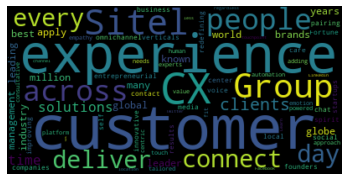

In [115]:
# Start with one review:
word = data.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(word)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [116]:
#Deskripsi dari company Sitel
data.description[0]

'Sitel Group’s 75,000 people across the globe connect many of the world’s best-known brands with their customers - 3.5 million times every day. As a global customer experience (CX) management leader, we apply our 30+ years of industry-leading experience and the entrepreneurial spirit of our group’s founders to deliver omnichannel experiences through voice, chat, social media and more to customers of our 400+ clients across all verticals – from Fortune 500 companies to local startups.\n\nWe are redefining the contact center and improving business results by pairing innovative solutions - such as self-care and automation - with the human touch, emotion and empathy of our people. As a CX platform, we are powered by experts to deliver tailored CX solutions to fit our clients’ needs through our consultative, customer-centric approach adding value at every touchpoint - regardless of location, channel or time of day.\n\nLearn more at www.sitel.com and connect with us on Facebook, LinkedIn and

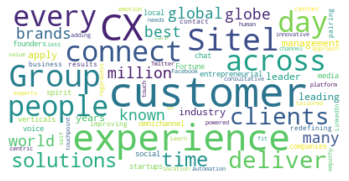

In [117]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [119]:
# Save the image in the img folder:
wordcloud.to_file("Sitel_review.png")

In [118]:
#Ulasan di bidang industri Construction
construction = " ".join(review for review in data[data["industry"]=="Construction"].description)

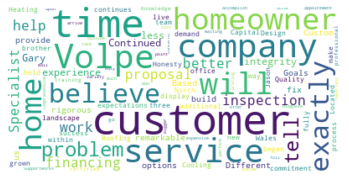

In [120]:
#Wordcloud dari deskripsi semua company yang bergerak di bidang construksi
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(construction)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [121]:
Sitel_mask = np.array(Image.open("gdrive/My Drive/Gedung.png"))
Sitel_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

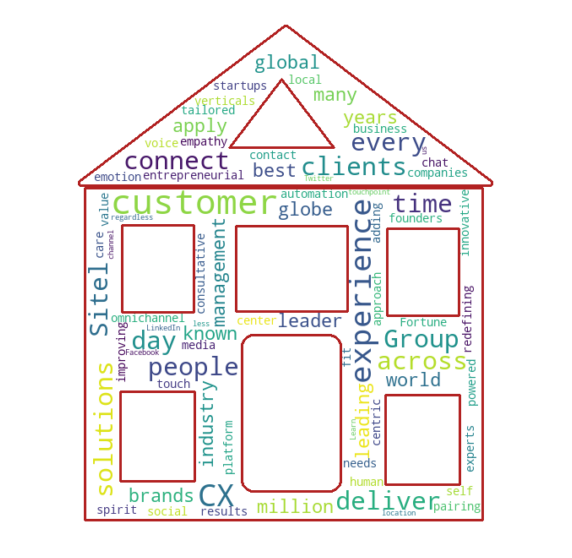

In [122]:
## Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=Sitel_mask,
               contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(word)

# store to file
wc.to_file("CompanySitelDecrition.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()